BTH02 Chủ đề: Các kỹ thuật tiền xử lý dữ liệu

#Câu 1: Khởi động và Tải dữ liệu


In [2]:
import pandas as pd
url_diem_thi = "https://github.com/anhdung98/diem_thi_2024/releases/download/240717/diem_thi_thpt_2024.csv"

df_diem_thi = pd.read_csv(url_diem_thi)
df_diem_thi.head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [21]:
df_diem_thi.tail()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
1061600,64007282,4.2,6.00,3.0,NaN,NaN,NaN,5.25,6.25,7.50,N1
1061601,64007283,5.2,6.00,3.6,NaN,NaN,NaN,6.25,5.75,7.75,N1
1061602,64007284,7.2,8.00,7.0,6.25,7.0,8.0,NaN,NaN,NaN,N1
1061603,64007285,5.2,5.25,4.4,NaN,NaN,NaN,4.75,6.50,8.75,N1
1061604,64007286,5.8,8.25,2.8,NaN,NaN,NaN,5.00,7.25,8.25,N1


In [6]:
print(f"Tổng số thí sinh dự thi: {df_diem_thi.shape[0]}")

Tổng số thí sinh dự thi: 1061605


Cách tính điểm tổ hợp KHTN/KHXH bằng cách cộng 3 môn lại và tất cả chia 3

#Câu 2: Phân tích Chuyên sâu và Trực quan hóa


In [29]:
import numpy as np
#2.1 Số bài thi môn toán

df= df_diem_thi
print(f"Có tổng cộng bài thi môn toán đã được chấm là: {df['toan'].count()}")

Có tổng cộng bài thi môn toán đã được chấm là: 1045613


In [31]:
df_diem_thi[df_diem_thi['sbd'].duplicated(keep=False)]

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Ma_tinh


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  int64  
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


In [11]:
bins = np.arange(0,10.2, 0.2) #tạo khoảng mở để bao phủ điểm
pho_diem_toan = df['toan'].value_counts(bins=bins).sort_index()
pho_diem_toan

,count
"(-0.001, 0.2]",1
"(0.2, 0.4]",1
"(0.4, 0.6]",5
"(0.6, 0.8]",12
"(0.8, 1.0]",43
"(1.0, 1.2]",126
"(1.2, 1.4]",278
"(1.4, 1.6]",619
"(1.6, 1.8]",1156
"(1.8, 2.0]",1975


Khoảng điểm 7.4 - 7.6 là có nhiều thí sinh đạt được nhất

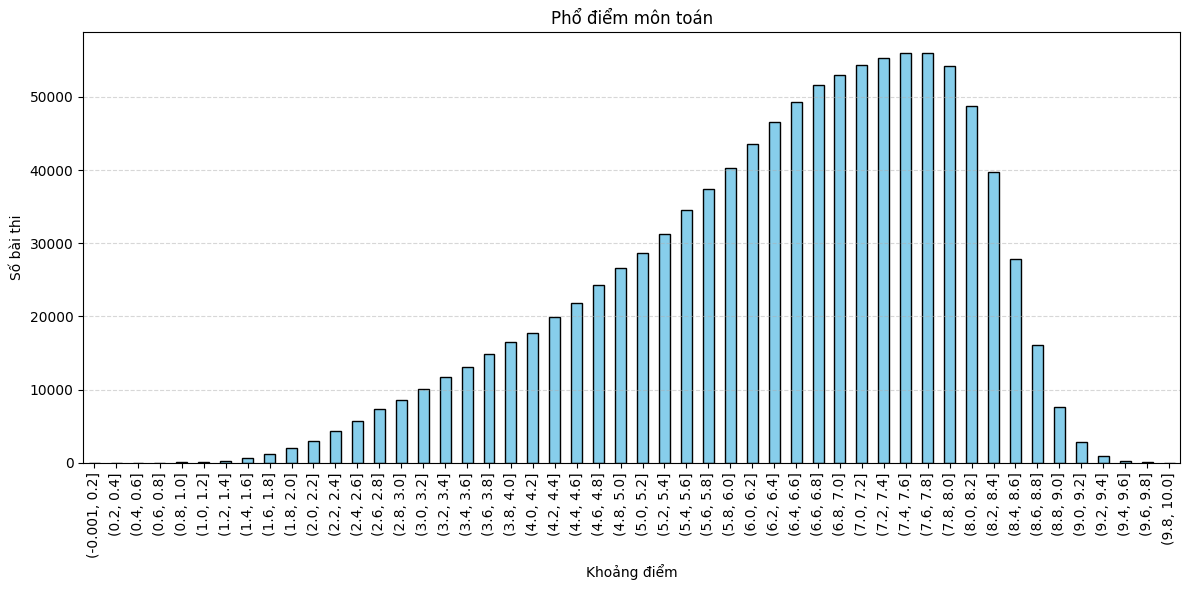

In [13]:
import matplotlib.pyplot as plt

pho_diem_toan.plot(kind='bar', figsize=(12,6), color="skyblue", edgecolor="black")

plt.title("Phổ điểm môn toán")
plt.xlabel("Khoảng điểm")
plt.ylabel("Số bài thi")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [16]:
df['toan'].mean()

np.float64(6.447309281732343)

In [15]:
df['toan'].median()

6.8

In [18]:
df['toan'].mode()[0]

np.float64(7.6)

In [19]:
df['toan'].std()

1.556900187367002

In [20]:
df['toan'].describe()

,toan
count,1.045613e+06
mean,6.447309e+00
std,1.556900e+00
min,0.000000e+00
25%,5.400000e+00
50%,6.800000e+00
75%,7.600000e+00
max,9.800000e+00


#Câu 3: Lọc Dữ liệu và Phân tích So sánh


Mã tỉnh của:
01 - THÀNH PHỐ HÀ NỘI, 02 - THÀNH PHỐ HỒ CHÍ MINH

In [22]:
df['sbd'] = df['sbd'].astype(str).str.zfill(8)
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  object 
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), object(2)
memory usage: 89.1+ MB


Dữ liệu Hà Nội, Tổng số thí sinh dự thi là 107867

In [26]:
df_hanoi = df[df['sbd'].str.startswith('01')].copy()
df_hanoi

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,6.75,8.0,6.00,5.25,5.00,NaN,NaN,NaN,N1
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1
...,...,...,...,...,...,...,...,...,...,...,...
107862,01108569,7.2,8.75,7.0,7.75,8.25,5.75,NaN,NaN,NaN,N1
107863,01108570,7.6,7.50,7.6,4.25,7.75,5.75,NaN,NaN,NaN,N1
107864,01108571,8.2,7.75,4.0,4.75,8.75,7.25,NaN,NaN,NaN,N1
107865,01108572,8.6,7.00,8.0,6.50,5.50,6.50,NaN,NaN,NaN,N1


Dữ liệu TP.HCM, Tổng số thí sinh dự thi là 87322

In [30]:
df_hcm = df[df['sbd'].str.startswith('02')].copy()
df_hcm

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Ma_tinh
107867,02000001,8.0,7.00,8.2,7.25,7.75,5.25,NaN,NaN,NaN,N1,02
107868,02000002,6.0,7.25,6.6,NaN,NaN,NaN,6.75,5.75,7.25,N1,02
107869,02000003,9.2,7.75,9.8,8.50,9.00,8.00,NaN,NaN,NaN,N1,02
107870,02000004,8.2,7.50,9.4,NaN,NaN,NaN,7.25,7.25,8.50,N1,02
107871,02000005,7.8,6.50,9.0,NaN,NaN,NaN,4.50,5.00,8.75,N1,02
...,...,...,...,...,...,...,...,...,...,...,...,...
195184,02087931,8.6,8.00,NaN,9.00,8.75,5.75,NaN,NaN,NaN,NaN,02
195185,02087932,5.8,8.25,8.8,NaN,NaN,NaN,7.00,7.00,7.50,N1,02
195186,02087933,6.4,6.50,NaN,5.50,5.75,5.00,NaN,NaN,NaN,NaN,02
195187,02087934,4.0,6.50,NaN,NaN,NaN,NaN,5.25,4.75,NaN,NaN,02


In [27]:
df['Ma_tinh'] = df['sbd'].str[:2]
df

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Ma_tinh
0,01000001,8.4,6.75,8.0,6.00,5.25,5.0,NaN,NaN,NaN,N1,01
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1,01
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1,01
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1,01
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1,01
...,...,...,...,...,...,...,...,...,...,...,...,...
1061600,64007282,4.2,6.00,3.0,NaN,NaN,NaN,5.25,6.25,7.50,N1,64
1061601,64007283,5.2,6.00,3.6,NaN,NaN,NaN,6.25,5.75,7.75,N1,64
1061602,64007284,7.2,8.00,7.0,6.25,7.00,8.0,NaN,NaN,NaN,N1,64
1061603,64007285,5.2,5.25,4.4,NaN,NaN,NaN,4.75,6.50,8.75,N1,64


##Phân tích môn toán TP.HCM

In [39]:
len(df_hcm)

87322

In [42]:
stats_toan_hcm = {
    'mean': df_hcm['toan'].mean(),
    'median': df_hcm['toan'].median(),
    "mode": df_hcm['toan'].mode()[0]}

stats_toan_hcm

{'mean': np.float64(6.983628354395255), 'median': 7.2, 'mode': np.float64(7.6)}

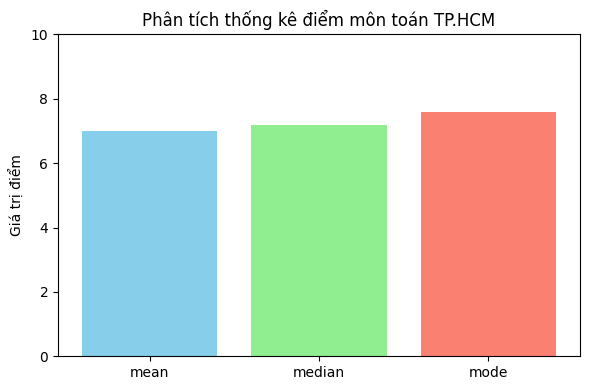

In [44]:
plt.figure(figsize=(6,4))
plt.bar(stats_toan_hcm.keys(), stats_toan_hcm.values(), color=['skyblue', 'lightgreen', 'salmon'])

plt.title("Phân tích thống kê điểm môn toán TP.HCM")

plt.ylabel("Giá trị điểm")

plt.ylim(0,10)

plt.tight_layout()
plt.show()

In [47]:
# 3.4. Tính điểm tổng cộng HCM

score_cols = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

df_hcm[score_cols] = df_hcm[score_cols].fillna(0)

df_hcm['Diem_KHTN'] = df_hcm['vat_li'] + df_hcm['hoa_hoc'] + df_hcm['sinh_hoc']

df_hcm['Diem_KHXH'] = df_hcm['lich_su'] + df_hcm['dia_li'] + df_hcm['gdcd']

df_hcm['Diem_Tong_Cong'] = df_hcm['toan'] + df_hcm['ngu_van'] + df_hcm['ngoai_ngu'] + df_hcm[['Diem_KHTN', 'Diem_KHXH']].max(axis=1)
df_hcm

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Ma_tinh,Diem_KHTN,Diem_KHXH,Diem_Tong_Cong
107867,02000001,8.0,7.00,8.2,7.25,7.75,5.25,0.00,0.00,0.00,N1,02,20.25,0.00,43.45
107868,02000002,6.0,7.25,6.6,0.00,0.00,0.00,6.75,5.75,7.25,N1,02,0.00,19.75,39.60
107869,02000003,9.2,7.75,9.8,8.50,9.00,8.00,0.00,0.00,0.00,N1,02,25.50,0.00,52.25
107870,02000004,8.2,7.50,9.4,0.00,0.00,0.00,7.25,7.25,8.50,N1,02,0.00,23.00,48.10
107871,02000005,7.8,6.50,9.0,0.00,0.00,0.00,4.50,5.00,8.75,N1,02,0.00,18.25,41.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195184,02087931,8.6,8.00,0.0,9.00,8.75,5.75,0.00,0.00,0.00,NaN,02,23.50,0.00,40.10
195185,02087932,5.8,8.25,8.8,0.00,0.00,0.00,7.00,7.00,7.50,N1,02,0.00,21.50,44.35
195186,02087933,6.4,6.50,0.0,5.50,5.75,5.00,0.00,0.00,0.00,NaN,02,16.25,0.00,29.15
195187,02087934,4.0,6.50,0.0,0.00,0.00,0.00,5.25,4.75,0.00,NaN,02,0.00,10.00,20.50


In [48]:
df_hcm.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/df_hcm.csv', index=False)

In [59]:
df_hcm['Diem_Tong_Cong'].describe()

,Diem_Tong_Cong
count,87322.000000
mean,38.443969
std,7.700110
min,2.400000
25%,34.550000
50%,39.850000
75%,43.950000
max,55.900000


##Phân tích môn toán Hà Nội

In [49]:
len(df_hanoi)

107867

In [50]:
stats_toan_hanoi = {
    'mean': df_hanoi['toan'].mean(),
    'median': df_hanoi['toan'].median(),
    "mode": df_hanoi['toan'].mode()[0]}

stats_toan_hanoi

{'mean': np.float64(6.747194849559848), 'median': 7.2, 'mode': np.float64(8.0)}

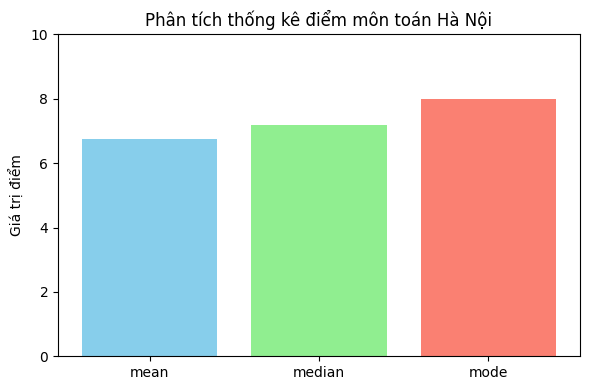

In [51]:
plt.figure(figsize=(6,4))
plt.bar(stats_toan_hanoi.keys(), stats_toan_hanoi.values(), color=['skyblue', 'lightgreen', 'salmon'])

plt.title("Phân tích thống kê điểm môn toán Hà Nội")

plt.ylabel("Giá trị điểm")

plt.ylim(0,10)

plt.tight_layout()
plt.show()

In [54]:
# 3.4. Tính điểm tổng cộng Hà Nội

score_cols = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

df_hanoi[score_cols] = df_hanoi[score_cols].fillna(0)

df_hanoi['Diem_KHTN'] = df_hanoi['vat_li'] + df_hanoi['hoa_hoc'] + df_hanoi['sinh_hoc']

df_hanoi['Diem_KHXH'] = df_hanoi['lich_su'] + df_hanoi['dia_li'] + df_hanoi['gdcd']

df_hanoi['Diem_Tong_Cong'] = df_hanoi['toan'] + df_hanoi['ngu_van'] + df_hanoi['ngoai_ngu'] + df_hanoi[['Diem_KHTN', 'Diem_KHXH']].max(axis=1)
df_hanoi

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Diem_KHTN,Diem_KHXH,Diem_Tong_Cong
0,01000001,8.4,6.75,8.0,6.00,5.25,5.00,0.00,0.00,0.00,N1,16.25,0.00,39.40
1,01000002,8.6,8.50,7.2,0.00,0.00,0.00,7.25,6.00,8.00,N1,0.00,21.25,45.55
2,01000003,8.2,8.75,8.2,0.00,0.00,0.00,7.25,7.25,8.75,N1,0.00,23.25,48.40
3,01000004,4.8,8.50,7.4,0.00,0.00,0.00,7.00,6.00,7.50,N1,0.00,20.50,41.20
4,01000005,8.6,9.00,7.8,0.00,0.00,0.00,9.00,8.75,8.50,N1,0.00,26.25,51.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107862,01108569,7.2,8.75,7.0,7.75,8.25,5.75,0.00,0.00,0.00,N1,21.75,0.00,44.70
107863,01108570,7.6,7.50,7.6,4.25,7.75,5.75,0.00,0.00,0.00,N1,17.75,0.00,40.45
107864,01108571,8.2,7.75,4.0,4.75,8.75,7.25,0.00,0.00,0.00,N1,20.75,0.00,40.70
107865,01108572,8.6,7.00,8.0,6.50,5.50,6.50,0.00,0.00,0.00,N1,18.50,0.00,42.10


In [55]:
df_hanoi.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/df_hanoi.csv', index=False)

##Vẽ biểu đồ so sánh

In [58]:
df_hanoi['Diem_Tong_Cong'].describe()

,Diem_Tong_Cong
count,107867.000000
mean,39.081294
std,8.888627
min,1.750000
25%,34.900000
50%,40.950000
75%,45.450000
max,57.850000


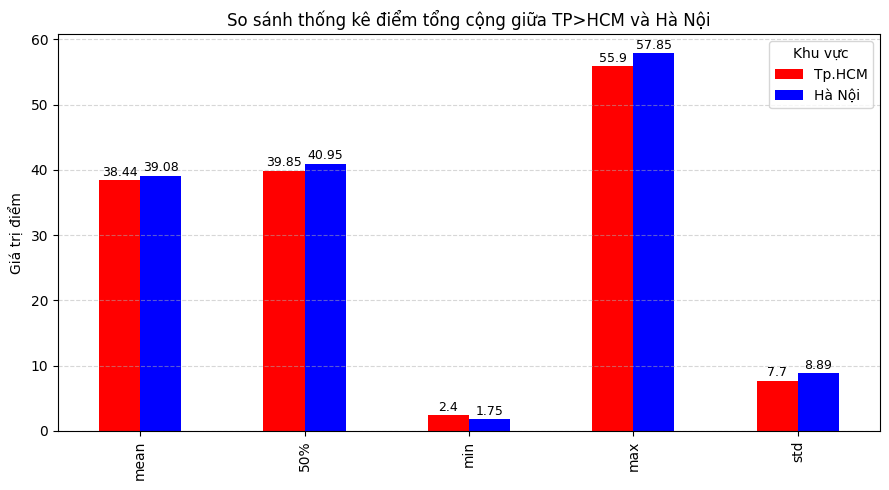

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Lấy thông tin describe
desc_hcm = df_hcm['Diem_Tong_Cong'].describe()
desc_hanoi = df_hanoi['Diem_Tong_Cong'].describe()

# 2. Chọn các thông số cần biểu diễn

thong_so = ['mean', '50%', 'min', 'max', 'std']

label = {
    'mean': 'Trung bình',
    '50%': 'Trung vị',
    'min': 'Giá trị nhỏ nhất',
    'max': 'Giá trị lớn nhất',
    'std': 'Độ lệch chuẩn'
}

# 3. Tạo dataframe để so sánh
df_stats = pd.DataFrame({
    'Tp.HCM': desc_hcm[thong_so],
    'Hà Nội': desc_hanoi[thong_so]
})

# 4. Thiết lập biểu đồ
ax = df_stats.plot(kind='bar', figsize=(9,5), color=['red', 'blue'])

# 5. Tùy chỉnh hiển thị của biểu đồ
plt.title("So sánh thống kê điểm tổng cộng giữa TP>HCM và Hà Nội")
plt.ylabel("Giá trị điểm")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 6. Gán nhãn trên từng cột
for container in ax.containers:
  for bar in container:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.2,
        round(bar.get_height(),2),
        ha="center",
        va="bottom",
        fontsize=9
    )

# 7. Hiển thị biểu đồ
plt.legend(loc='upper right', title="Khu vực")
plt.tight_layout()
plt.show()

#Câu 4: Áp dụng Logic Phức tạp - Xếp loại Tốt nghiệp


In [60]:
df_hcm_raw = df_diem_thi[df_diem_thi['sbd'].str.startswith('02')].copy()
df_hcm_raw

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Ma_tinh
107867,02000001,8.0,7.00,8.2,7.25,7.75,5.25,NaN,NaN,NaN,N1,02
107868,02000002,6.0,7.25,6.6,NaN,NaN,NaN,6.75,5.75,7.25,N1,02
107869,02000003,9.2,7.75,9.8,8.50,9.00,8.00,NaN,NaN,NaN,N1,02
107870,02000004,8.2,7.50,9.4,NaN,NaN,NaN,7.25,7.25,8.50,N1,02
107871,02000005,7.8,6.50,9.0,NaN,NaN,NaN,4.50,5.00,8.75,N1,02
...,...,...,...,...,...,...,...,...,...,...,...,...
195184,02087931,8.6,8.00,NaN,9.00,8.75,5.75,NaN,NaN,NaN,NaN,02
195185,02087932,5.8,8.25,8.8,NaN,NaN,NaN,7.00,7.00,7.50,N1,02
195186,02087933,6.4,6.50,NaN,5.50,5.75,5.00,NaN,NaN,NaN,NaN,02
195187,02087934,4.0,6.50,NaN,NaN,NaN,NaN,5.25,4.75,NaN,NaN,02


In [69]:
def xep_loai_tot_nghiep(row):
  mon_thi_xet = ['toan', 'ngu_van', 'ngoai_ngu']
  mon_khtn = ['vat_li', 'hoa_hoc', 'sinh_hoc']
  mon_khxh = ['dia_li', 'lich_su', 'gdcd']

  #Xác định tổ hợp thí sinh
  if row[mon_khtn].notna().all():
    mon_thi_xet.extend(mon_khtn)
  elif row[mon_khxh].notna().all():
    mon_thi_xet.extend(mon_khxh)
  else:
    return "Không tốt nghiệp"

  #Kiểm tra điểm liệt
  if(row[mon_thi_xet] <1.0).any():
    return "Không tốt nghiệp"

  #Tính điểm xét tốt nghiệp
  dxtn = row[mon_thi_xet].mean()

  #Kiểm tra điểm đạt (>= 5.0)
  if dxtn <5.0:
    return "Không tốt nghiệp"

  # Xếp loại
  if dxtn >= 8.0 and (row[mon_thi_xet] >= 7.0).all():
    return "Giỏi"
  if dxtn >= 6.5 and (row[mon_thi_xet] >= 6.0).all():
    return "Khá"
  return "Trung bình"


In [70]:
df_hcm_raw['Xep_loai'] = df_hcm_raw.apply(xep_loai_tot_nghiep, axis=1)
ket_qua_xep_loai = df_hcm_raw['Xep_loai'].value_counts()
ket_qua_xep_loai

,count
Xep_loai,
Trung bình,53082
Khá,18357
Không tốt nghiệp,12031
Giỏi,3852


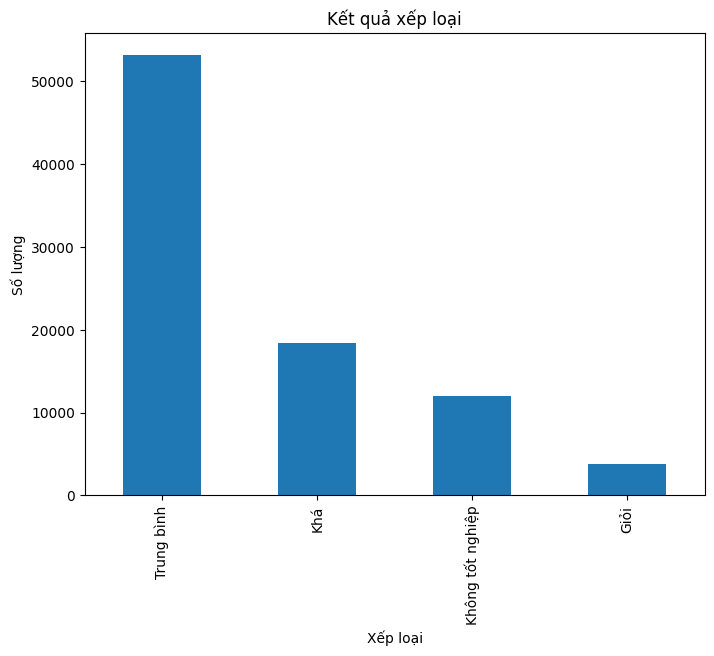

In [71]:
#Vẽ biểu đồ
ket_qua_xep_loai.plot(kind='bar', figsize=(8,6), title='Kết quả xếp loại')
plt.xlabel("Xếp loại")
plt.ylabel("Số lượng")
plt.show()

#Câu 5: Các Kỹ thuật Tiền xử lý Nâng cao


##5.1. Phát hiện Ngoại lệ (Outlier Detection)


In [74]:
df_hcm = df[df['sbd'].str.startswith('02')].copy()
df_hcm

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,Ma_tinh
107867,02000001,8.0,7.00,8.2,7.25,7.75,5.25,NaN,NaN,NaN,N1,02
107868,02000002,6.0,7.25,6.6,NaN,NaN,NaN,6.75,5.75,7.25,N1,02
107869,02000003,9.2,7.75,9.8,8.50,9.00,8.00,NaN,NaN,NaN,N1,02
107870,02000004,8.2,7.50,9.4,NaN,NaN,NaN,7.25,7.25,8.50,N1,02
107871,02000005,7.8,6.50,9.0,NaN,NaN,NaN,4.50,5.00,8.75,N1,02
...,...,...,...,...,...,...,...,...,...,...,...,...
195184,02087931,8.6,8.00,NaN,9.00,8.75,5.75,NaN,NaN,NaN,NaN,02
195185,02087932,5.8,8.25,8.8,NaN,NaN,NaN,7.00,7.00,7.50,N1,02
195186,02087933,6.4,6.50,NaN,5.50,5.75,5.00,NaN,NaN,NaN,NaN,02
195187,02087934,4.0,6.50,NaN,NaN,NaN,NaN,5.25,4.75,NaN,NaN,02


In [75]:
Q1_toan = df_hcm['toan'].quantile(0.25)
Q3_toan = df_hcm['toan'].quantile(0.75)

IQR_toan = Q3_toan - Q1_toan
print(f"Q1: {Q1_toan}, Q3: {Q3_toan}, IQR: {IQR_toan}")



Q1: 6.2, Q3: 7.8, IQR: 1.5999999999999996


##5.2. Chuẩn hóa Dữ liệu (Data Scaling)


In [77]:
from sklearn.preprocessing import StandardScaler

df_hcm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/df_hcm.csv')
df_hcm

# Sử dujg df_hcm_fill 0
score_cols = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
df_hcm_scores = df_hcm[score_cols]
df_hcm_scores

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,8.0,7.00,8.2,7.25,7.75,5.25,0.00,0.00,0.00
1,6.0,7.25,6.6,0.00,0.00,0.00,6.75,5.75,7.25
2,9.2,7.75,9.8,8.50,9.00,8.00,0.00,0.00,0.00
3,8.2,7.50,9.4,0.00,0.00,0.00,7.25,7.25,8.50
4,7.8,6.50,9.0,0.00,0.00,0.00,4.50,5.00,8.75
...,...,...,...,...,...,...,...,...,...
87317,8.6,8.00,0.0,9.00,8.75,5.75,0.00,0.00,0.00
87318,5.8,8.25,8.8,0.00,0.00,0.00,7.00,7.00,7.50
87319,6.4,6.50,0.0,5.50,5.75,5.00,0.00,0.00,0.00
87320,4.0,6.50,0.0,0.00,0.00,0.00,5.25,4.75,0.00


In [78]:
scaler = StandardScaler()
df_hcm_scaled = scaler.fit_transform(df_hcm_scores)
df_hcm_scaled = pd.DataFrame(df_hcm_scaled, columns=score_cols)
df_hcm_scaled

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,0.790424,0.333549,0.856876,1.093744,1.190297,0.545413,-0.825304,-0.832545,-0.705276
1,-0.669497,0.510768,0.318734,-1.061734,-1.075062,-1.086405,1.171067,0.752903,1.126910
2,1.666377,0.865206,1.395019,1.465378,1.555678,1.400175,-0.825304,-0.832545,-0.705276
3,0.936416,0.687987,1.260483,-1.061734,-1.075062,-1.086405,1.318946,1.166498,1.442804
4,0.644432,-0.020890,1.125947,-1.061734,-1.075062,-1.086405,0.505610,0.546106,1.505983
...,...,...,...,...,...,...,...,...,...
87317,1.228400,1.042425,-1.901104,1.614032,1.482602,0.700824,-0.825304,-0.832545,-0.705276
87318,-0.815489,1.219644,1.058679,-1.061734,-1.075062,-1.086405,1.245007,1.097566,1.190089
87319,-0.377513,-0.020890,-1.901104,0.573456,0.605688,0.467708,-0.825304,-0.832545,-0.705276
87320,-2.129418,-0.020890,-1.901104,-1.061734,-1.075062,-1.086405,0.727429,0.477173,-0.705276


##5.3. Rời rạc hóa Dữ liệu (Binning)


In [79]:
bins = [0,4.99,6.49,7.99,10]
labels = ['Yếu-TB', 'Khá', 'Giỏi', 'Xuất sắc']
df_hcm['Nhom_diem_toan'] = pd.cut(df_hcm['toan'], bins=bins, labels=labels, right=True, include_lowest=True)
nhom_diem_toan = df_hcm['Nhom_diem_toan'].value_counts()
nhom_diem_toan

,count
Nhom_diem_toan,
Giỏi,39794
Khá,20879
Xuất sắc,20724
Yếu-TB,5925
